In [1]:
import keras
from keras.layers import Conv2D, Dropout, BatchNormalization, Activation
from keras.layers import Flatten, Dense, MaxPooling2D, ZeroPadding2D
from keras.models import Sequential

from keras import optimizers
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
alexnet = Sequential()
    
# First conv layer
    
alexnet.add(Conv2D(input_shape = x_train.shape[1:], filters = 96, kernel_size =  (11, 11), strides = (4, 4), activation = 'relu', padding = 'same'))
alexnet.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))
alexnet.add(BatchNormalization())

# Second conv layer

alexnet.add(Conv2D(filters = 256, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', padding = 'same'))
alexnet.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))
alexnet.add(BatchNormalization())


''' Only first two layers have normalized inputs/outputs, rest Conv layers do not have normalization.'''
# Third conv layer
alexnet.add(ZeroPadding2D(padding = (1, 1)))
alexnet.add(Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'))
alexnet.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))

# Fourth conv layer
alexnet.add(ZeroPadding2D(padding = (1, 1)))
alexnet.add(Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'))
alexnet.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))

# Fifth conv layer
alexnet.add(ZeroPadding2D(padding = (1, 1)))
alexnet.add(Conv2D(filters = 256, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', padding = 'same'))
alexnet.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))

alexnet.add(Flatten())

# Three dense/fully-connected layers

# First FC
alexnet.add(Dense(4096, activation = 'relu'))
alexnet.add(Dropout(0.5))

# Second FC
alexnet.add(Dense(4096, activation = 'relu'))
alexnet.add(Dropout(0.5))

# Third FC
alexnet.add(Dense(1000, activation = 'relu'))
alexnet.add(Dropout(0.5))

# Output layer
alexnet.add(Dense(num_classes, activation = 'softmax'))


In [4]:
alexnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 1, 256)         1024      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 3, 3, 256)         0         
__________

In [5]:
WEIGHT_DECAY = 0.0005
MOMENTUM = 0.9
BATCH_SIZE = 128
LEARNING_RATE = 0.01

alexnet.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, decay = WEIGHT_DECAY))

In [6]:
from keras.utils import plot_model

plot_model(alexnet, to_file='alexnet.png', show_shapes=True, show_layer_names=True)

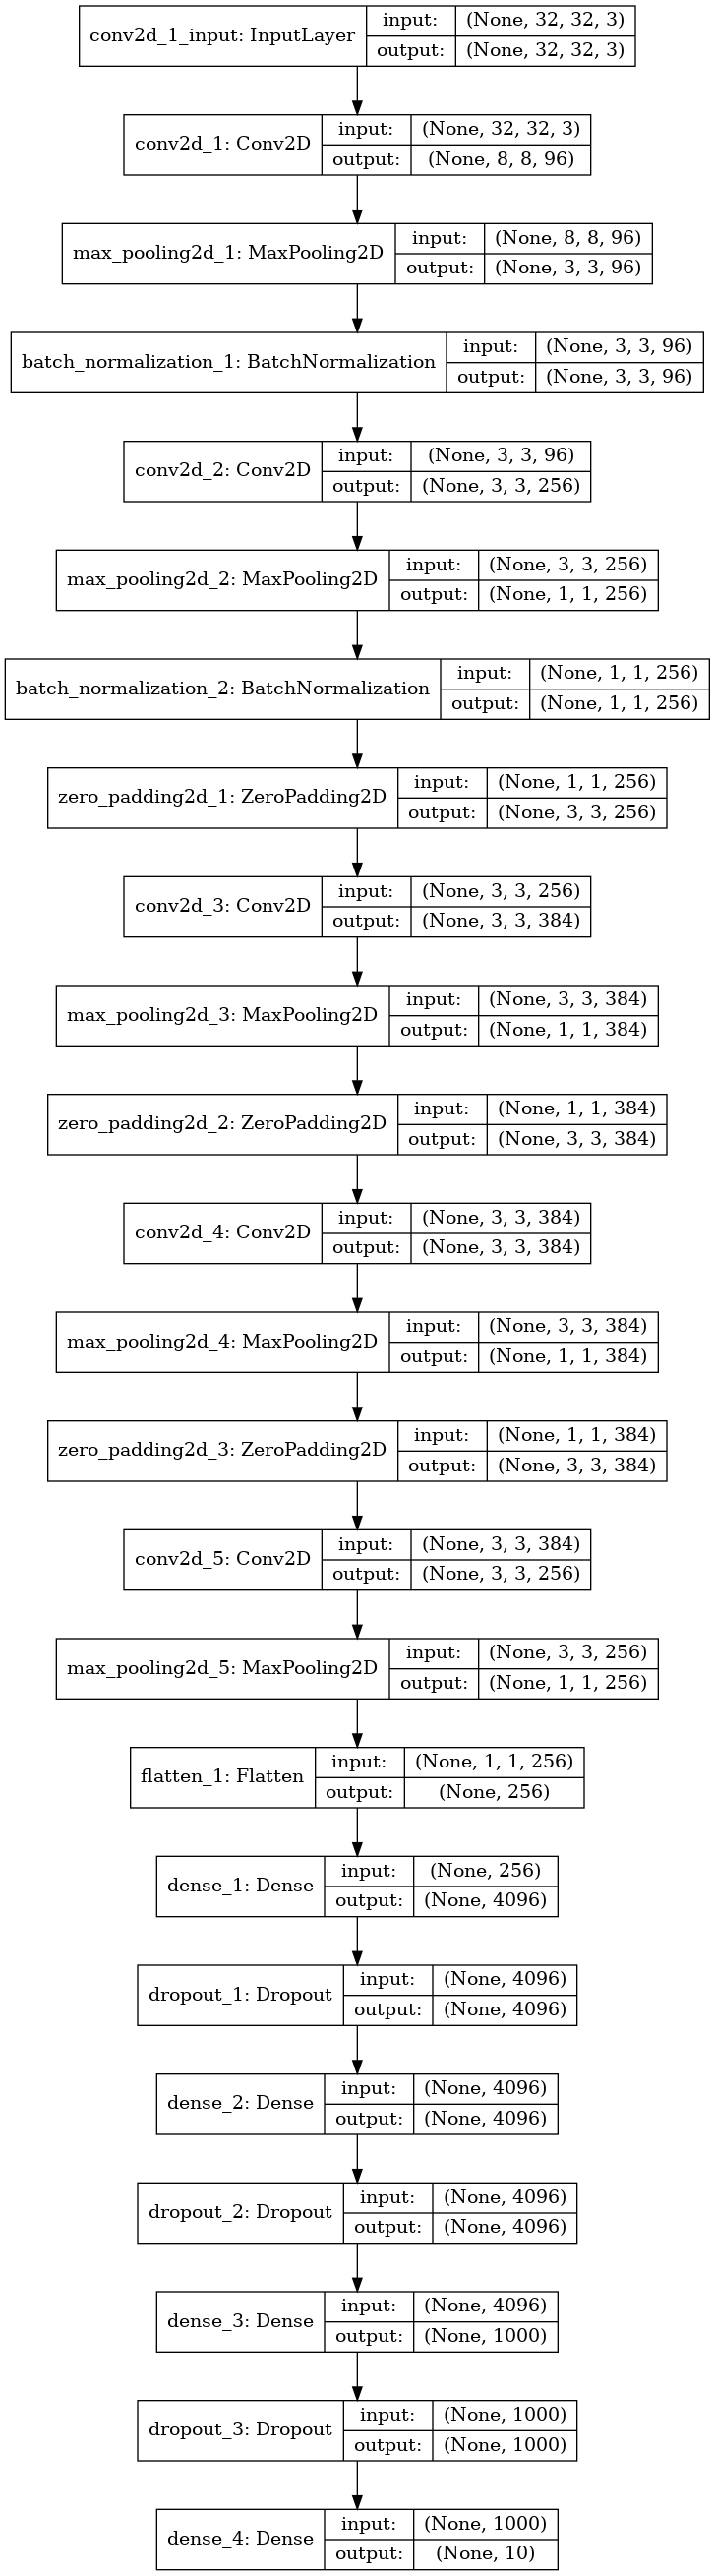

In [7]:
import IPython

IPython.display.Image('alexnet.png')

In [8]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
'''Providing test data as validation data'''
train_history = alexnet.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = 100, validation_data = (x_test, y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 33s 663us/step - loss: 2.1232 - acc: 0.1599 - val_loss: 1.9205 - val_acc: 0.2180
Epoch 2/100
50000/50000 [==============================] - 26s 524us/step - loss: 1.7422 - acc: 0.3054 - val_loss: 1.8494 - val_acc: 0.3130
Epoch 3/100
50000/50000 [==============================] - 26s 525us/step - loss: 1.5311 - acc: 0.4218 - val_loss: 1.8301 - val_acc: 0.3492
Epoch 4/100
50000/50000 [==============================] - 26s 526us/step - loss: 1.3956 - acc: 0.4783 - val_loss: 1.5738 - val_acc: 0.4199
Epoch 5/100
50000/50000 [==============================] - 26s 526us/step - loss: 1.2775 - acc: 0.5252 - val_loss: 1.4041 - val_acc: 0.4929
Epoch 6/100
50000/50000 [==============================] - 26s 527us/step - loss: 1.1680 - acc: 0.5671 - val_loss: 1.3098 - val_acc: 0.5293
Epoch 7/100
50000/50000 [==============================] - 26s 527us/step - loss: 1.0612 - acc: 0.6049 - val_l

Epoch 59/100
50000/50000 [==============================] - 27s 542us/step - loss: 0.0033 - acc: 0.9990 - val_loss: 3.6467 - val_acc: 0.5986
Epoch 60/100
50000/50000 [==============================] - 27s 542us/step - loss: 0.0029 - acc: 0.9993 - val_loss: 3.6359 - val_acc: 0.6038
Epoch 61/100
50000/50000 [==============================] - 27s 543us/step - loss: 0.0029 - acc: 0.9994 - val_loss: 3.6738 - val_acc: 0.6042
Epoch 62/100
50000/50000 [==============================] - 27s 543us/step - loss: 0.0029 - acc: 0.9993 - val_loss: 3.6878 - val_acc: 0.5992
Epoch 63/100
50000/50000 [==============================] - 27s 543us/step - loss: 0.0039 - acc: 0.9989 - val_loss: 3.6844 - val_acc: 0.6025
Epoch 64/100
50000/50000 [==============================] - 27s 540us/step - loss: 0.0025 - acc: 0.9993 - val_loss: 3.6859 - val_acc: 0.6033
Epoch 65/100
50000/50000 [==============================] - 27s 544us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 3.7195 - val_acc: 0.6014
Epoch 66/100


In [12]:
train_score = alexnet.evaluate(x_train, y_train, verbose=0)
print('Train accuracy: {}'.format(train_score[1]*100))
test_score = alexnet.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: {}'.format(test_score[1]*100))

Train accuracy: 100.0
Test accuracy: 61.0


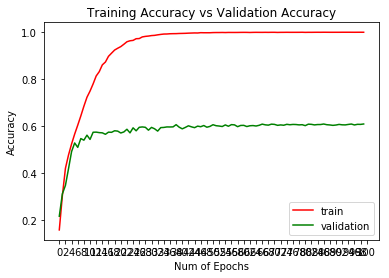

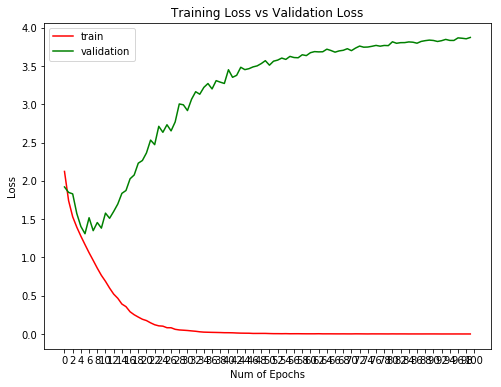

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(train_history.history['acc'],'r')
plt.plot(train_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(train_history.history['loss'],'r')
plt.plot(train_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

In [ ]:
'''Probably something is horribly wrong (we are overfitting!) with parameters, less data for training or model cause the validation loss keeps on increasing as epochs go on.Possible things to reduce overfitting could be using Dropout more or use data augmentation technique. But inherently, this notebook is made to learn about the architecture of AlexNet, not to achieve the accuracy level'''